In [ ]:
#before running this please change the RUNTIME to GPU (Runtime -> Change runtime type -> set harware accelarotor as GPU)
#Mount our google drive
#from google.colab import drive
#drive.mount('/content/drive')

Note : Use the drive link for the processed dataset

In [2]:
!pip3 install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 17.7 MB/s eta 0:00:00:00:010:01
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566162 sha256=5cbfa122a4b66dcf9f101afdf5996256502ddeb8850aa83a4d02eea066030700
  Stored in directory: /root/.cache/pip/wheels/04/52/ec/9355da79c29f160b038a20c784db2803c2f9fa2c8a462c176a
Successfully built face-recognition-models


In [ ]:
import glob
import torch
import torchvision
from torchvision import transforms
import os
import numpy as np
import cv2
from tqdm import tqdm  # <-- progress bar

# Extract frames from video
def frame_extract(path):
    vidObj = cv2.VideoCapture(path)
    success = 1
    while success:
        success, image = vidObj.read()
        if success:
            yield image

# Check if video can be processed (i.e., not corrupted)
def validate_video(vid_path, train_transforms):
    count = 20
    frames = []
    a = int(100 / count)
    first_frame = np.random.randint(0, a)
    for i, frame in enumerate(frame_extract(vid_path)):
        frames.append(train_transforms(frame))
        if len(frames) == count:
            break
    frames = torch.stack(frames)
    frames = frames[:count]
    return frames

# Set image size and transformations
im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((im_size, im_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

# Collect all video paths
video_fil = []
video_fil += glob.glob('/kaggle/input/data-deepfake/Celeb_fake_face_only-20250412T122325Z-001/Celeb_fake_face_only/*.mp4')
video_fil += glob.glob('/content/drive/MyDrive/data/extractedfolder/Celeb_real_face_only/*.mp4')
'''video_fil += glob.glob('/content/drive/MyDrive/data/extractedfolder/DFDC_FAKE_Face_only_data/*.mp4')
video_fil += glob.glob('/content/drive/MyDrive/data/extractedfolder/DFDC_REAL_Face_only_data/*.mp4')
video_fil += glob.glob('/content/drive/MyDrive/data/extractedfolder/FF_Face_only_data/*.mp4')'''

print("Total number of videos:", len(video_fil))

# Loop through videos with progress bar
corrupted_videos = []
for i in tqdm(video_fil, desc="Processing videos"):
    try:
        validate_video(i, train_transforms)
    except Exception as e:
        print(f"\nCorrupted video: {i}")
        corrupted_videos.append(i)

# Final summary
print(f"\n✅ Processed {len(video_fil)} videos")
print(f"❌ Corrupted videos found: {len(corrupted_videos)}")

if corrupted_videos:
    print("\nList of corrupted videos:")
    for v in corrupted_videos:
        print(v)


In [3]:
#to load preprocessod video to memory
import json
import glob
import numpy as np
import cv2
import copy
import random
video_files =  glob.glob('/kaggle/input/data-deepfake/Celeb_fake_face_only-20250412T122325Z-001/Celeb_fake_face_only/*.mp4')
video_files += glob.glob('/kaggle/input/data-deepfake/Celeb_real_face_only-20250412T122518Z-001/Celeb_real_face_only/*.mp4')
video_files += glob.glob('/kaggle/input/data-deepfake/DFDC_FAKE_Face_only_data-20250412T122756Z-001/DFDC_FAKE_Face_only_data/*.mp4')
video_files += glob.glob('/kaggle/input/data-deepfake/DFDC_REAL_Face_only_data-20250412T122833Z-001/DFDC_REAL_Face_only_data/*.mp4')
video_files += glob.glob('/kaggle/input/data-deepfake/FF_Face_only_data-20250412T122625Z-001/FF_Face_only_data/*.mp4')

random.shuffle(video_files)
random.shuffle(video_files)
frame_count = []
for video_file in video_files:
  cap = cv2.VideoCapture(video_file)
  if(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))<100):
    video_files.remove(video_file)
    continue
  frame_count.append(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
print("frames are " , frame_count)
print("Total no of video: " , len(frame_count))
print('Average frame per video:',np.mean(frame_count))

frames are  [148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 139, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 126, 148, 148, 148, 148, 148, 148, 148, 148, 148, 121, 148, 146, 148, 148, 148, 148, 148, 148, 148, 148, 148, 132, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 14

In [4]:
# load the video name and labels from csv
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
class video_dataset(Dataset):
    def __init__(self,video_names,labels,sequence_length = 10,transform = None):
        self.video_names = video_names
        self.labels = labels
        self.transform = transform
        self.count = sequence_length
    def __len__(self):
        return len(self.video_names)
    def __getitem__(self,idx):
        video_path = self.video_names[idx]
        frames = []
        a = int(100/self.count)
        first_frame = np.random.randint(0,a)
        temp_video = video_path.split('/')[-1]
        #print(temp_video)
        label = self.labels.iloc[(labels.loc[labels["file"] == temp_video].index.values[0]),1]
        if(label == 'FAKE'):
          label = 0
        if(label == 'REAL'):
          label = 1
        for i,frame in enumerate(self.frame_extract(video_path)):
          # Check if the frame is valid before processing
          if frame is not None and frame.size != 0:  # Check if frame is not empty
            frames.append(self.transform(frame))
          else:
            # Handle invalid or empty frames (e.g., skip or pad)
            # For this example, we pad with a black frame of the correct size.
            # If you have a previous valid frame, replace np.zeros with it.
            frames.append(self.transform(np.zeros((im_size, im_size, 3), dtype=np.uint8)))
          if(len(frames) == self.count):
            break
        frames = torch.stack(frames)
        frames = frames[:self.count]
        #print("length:" , len(frames), "label",label)
        return frames,label
    def frame_extract(self,path):
      vidObj = cv2.VideoCapture(path)
      success = 1
      while success:
          success, image = vidObj.read()
          if success:
              yield image
#plot the image
def im_plot(tensor):
    image = tensor.cpu().numpy().transpose(1,2,0)
    b,g,r = cv2.split(image)
    image = cv2.merge((r,g,b))
    image = image*[0.22803, 0.22145, 0.216989] +  [0.43216, 0.394666, 0.37645]
    image = image*255.0
    plt.imshow(image.astype(int))
    plt.show()

In [5]:
#count the number of fake and real videos
def number_of_real_and_fake_videos(data_list):
  header_list = ["file","label"]
  lab = pd.read_csv('/kaggle/input/labels/Gobal_metadata.csv',names=header_list)
  fake = 0
  real = 0
  for i in data_list:
    temp_video = i.split('/')[-1]
    # Get matching indices
    matching_indices = labels.loc[labels["file"] == temp_video].index

    # Check if any matches were found
    if len(matching_indices) > 0:
      label = lab.iloc[matching_indices[0], 1]
      if label == 'FAKE':
        fake += 1
      elif label == 'REAL':
        real += 1
  return real, fake

train :  5141
test :  1286
TRAIN:  Real: 2645  Fake: 2496
TEST:  Real: 656  Fake: 630


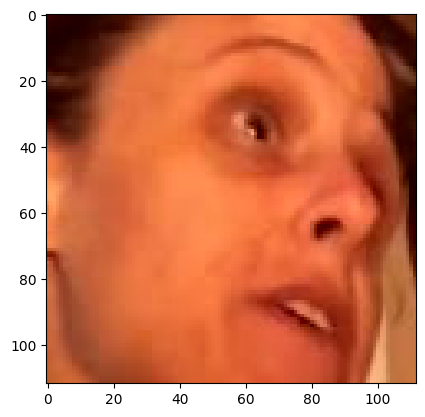

In [6]:
# load the labels and video in data loader
import random
import pandas as pd
from sklearn.model_selection import train_test_split

header_list = ["file","label"]
labels = pd.read_csv('/kaggle/input/labels/Gobal_metadata.csv',names=header_list)
#print(labels)
train_videos = video_files[:int(0.8*len(video_files))]
valid_videos = video_files[int(0.8*len(video_files)):]
print("train : " , len(train_videos))
print("test : " , len(valid_videos))
# train_videos,valid_videos = train_test_split(data,test_size = 0.2)
# print(train_videos)

print("TRAIN: ", "Real:",number_of_real_and_fake_videos(train_videos)[0]," Fake:",number_of_real_and_fake_videos(train_videos)[1])
print("TEST: ", "Real:",number_of_real_and_fake_videos(valid_videos)[0]," Fake:",number_of_real_and_fake_videos(valid_videos)[1])


im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])

test_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])
train_data = video_dataset(train_videos,labels,sequence_length = 10,transform = train_transforms)
#print(train_data)
val_data = video_dataset(valid_videos,labels,sequence_length = 10,transform = train_transforms)
train_loader = DataLoader(train_data,batch_size = 4,shuffle = True,num_workers = 4)
valid_loader = DataLoader(val_data,batch_size = 4,shuffle = True,num_workers = 4)
image,label = train_data[0]
im_plot(image[0,:,:,:])

In [ ]:
#efficientnet b3 + gru ----give less accuracy than tcn variant
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models

# Temporal Attention Module: Applies a learned weight to each time-step.
class TemporalAttention(nn.Module):
    def __init__(self, input_dim):
        """
        Initializes the Temporal Attention module.
        :param input_dim: The dimensionality of the GRU output (hidden dimension * 2 if bidirectional).
        """
        super(TemporalAttention, self).__init__()
        self.attention = nn.Linear(input_dim, 1)  # Compute a scalar attention score for each time-step

    def forward(self, x):
        """
        Forward pass of the attention module.
        :param x: Tensor of shape (batch, seq_length, input_dim)
        :return: Weighted feature vector of shape (batch, input_dim) and attention weights
        """
        # Calculate attention scores and apply softmax over the sequence length
        attn_scores = self.attention(x)                  # (batch, seq_length, 1)
        attn_weights = F.softmax(attn_scores, dim=1)       # Normalize across time steps
        weighted_output = torch.sum(attn_weights * x, dim=1)  # (batch, input_dim)
        return weighted_output, attn_weights

# Complete Model Architecture
class Model(nn.Module):
    def __init__(self, num_classes, latent_dim=1536, gru_layers=1, hidden_dim=1536, dropout_prob=0.4, bidirectional=True):
        """
        Initializes the model.
        :param num_classes: Number of classes for classification.
        :param latent_dim: Output feature dimension from EfficientNet-B3 (default is 1536).
        :param gru_layers: Number of GRU layers.
        :param hidden_dim: GRU hidden dimension.
        :param dropout_prob: Dropout probability for the FC layers.
        :param bidirectional: Use a bidirectional GRU.
        """
        super(Model, self).__init__()

        # EfficientNet-B3 Backbone for spatial feature extraction.
        # Use 'weights' argument instead of 'pretrained'
        base_model = models.efficientnet_b3(weights=models.EfficientNet_B3_Weights.IMAGENET1K_V1)
        self.cnn_backbone = base_model.features  # Extracts features; final shape: (batch*seq, 1536, H, W)
        self.avgpool = nn.AdaptiveAvgPool2d(1)     # Pooling layer to collapse H, W to 1x1

        # Bidirectional GRU for temporal modeling.
        self.gru = nn.GRU(
            input_size=latent_dim,
            hidden_size=hidden_dim,
            num_layers=gru_layers,
            batch_first=True,
            bidirectional=bidirectional
        )
        # If bidirectional, GRU output dimension becomes hidden_dim*2.
        attn_input_dim = hidden_dim * 2 if bidirectional else hidden_dim

        # Temporal Attention module to aggregate sequence outputs.
        self.temporal_attention = TemporalAttention(attn_input_dim)

        # Fully connected layers for classification.
        # LeakyReLU is the activation function used here.
        self.fc1 = nn.Linear(attn_input_dim, hidden_dim)
        self.bn = nn.BatchNorm1d(hidden_dim)
        self.dropout = nn.Dropout(dropout_prob)
        self.leaky_relu = nn.LeakyReLU()
        self.classifier = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        """
        Forward pass of the model.
        :param x: Input tensor of shape (batch, seq_length, channels, height, width)
        :return: A tuple (feature_map, logits)
                 - feature_map: CNN features for visualization.
                 - logits: Classification output.
        """
        batch_size, seq_length, c, h, w = x.shape

        # Process each frame independently through the CNN backbone.
        x = x.view(batch_size * seq_length, c, h, w)
        fmap = self.cnn_backbone(x)                # Feature maps from EfficientNet-B3
        pooled_features = self.avgpool(fmap)       # (batch*seq, latent_dim, 1, 1)
        pooled_features = pooled_features.view(batch_size, seq_length, -1)  # (batch, seq, latent_dim)

        # Temporal modeling: GRU processes sequence of CNN features.
        gru_out, _ = self.gru(pooled_features)       # (batch, seq, hidden_dim * (2 if bidirectional else 1))

        # Temporal Attention: Aggregate GRU outputs into a single feature vector.
        attn_out, attn_weights = self.temporal_attention(gru_out)  # (batch, attn_input_dim)

        # Fully connected classification head.
        x_fc = self.fc1(attn_out)                   # (batch, hidden_dim)
        x_fc = self.bn(x_fc)
        x_fc = self.leaky_relu(x_fc)                # LeakyReLU activation applied here
        x_fc = self.dropout(x_fc)
        logits = self.classifier(x_fc)              # (batch, num_classes)

        return fmap, logits

# Example usage to test shapes:
if __name__ == "__main__":
    # Simulate a batch of videos:
    # Batch of 2 videos, each with 10 frames; each frame is 300x300 with 3 channels (RGB)
    dummy_input = torch.randn(2, 10, 3, 300, 300)
    model = Model(num_classes=2)  # For binary classification (e.g., deepfake vs. real)
    feature_map, logits = model(dummy_input)

    print("Feature map shape:", feature_map.shape)  # Expected: (4*10, 1536, H, W) from EfficientNet-B3 backbone
    print("Logits shape:", logits.shape)            # Expected: (2, 2)


In [ ]:
#efficientnet + tcn with schtoic depth and lower tcn 

import torch
from torch import nn
from torchvision import models
import torch.nn.functional as F

class TemporalBlock(nn.Module):
    def __init__(self, n_inputs, n_outputs, kernel_size, stride, dilation, padding, dropout=0.5, survival_prob=1.0):
        super().__init__()
        self.survival_prob = survival_prob
        self.conv1 = nn.Conv1d(n_inputs, n_outputs, kernel_size, stride=stride, padding=padding, dilation=dilation)
        self.relu1 = nn.ReLU()
        self.dp1 = nn.Dropout(dropout)
        self.conv2 = nn.Conv1d(n_outputs, n_outputs, kernel_size, stride=stride, padding=padding, dilation=dilation)
        self.relu2 = nn.ReLU()
        self.dp2 = nn.Dropout(dropout)
        self.downsample = nn.Conv1d(n_inputs, n_outputs, 1) if n_inputs != n_outputs else None
        self.relu = nn.ReLU()

    def stochastic_residual(self, x, out):
        if not self.training or self.survival_prob == 1.0:
            return out + x
        else:
            binary_tensor = torch.rand((x.size(0), 1, 1), device=x.device) < self.survival_prob
            out = (out * binary_tensor) / self.survival_prob
            return out + x

    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.dp1(out)
        out = self.conv2(out)
        out = self.relu2(out)
        out = self.dp2(out)

        res = x if self.downsample is None else self.downsample(x)
        diff = out.shape[2] - res.shape[2]
        if diff > 0:
            res = F.pad(res, (diff // 2, diff - diff // 2))
        elif diff < 0:
            res = res[:, :, -out.shape[2]:]

        return self.relu(self.stochastic_residual(res, out))


class TCN(nn.Module):
    def __init__(self, num_inputs, num_channels, kernel_size=3, dropout=0.5, survival_base=0.9):
        super(TCN, self).__init__()
        layers = []
        for i in range(len(num_channels)):
            dilation = 2 ** i
            in_ch = num_inputs if i == 0 else num_channels[i - 1]
            out_ch = num_channels[i]
            survival_prob = survival_base ** (i + 1)
            layers.append(
                TemporalBlock(in_ch, out_ch, kernel_size, 1, dilation, (kernel_size - 1) * dilation,
                              dropout, survival_prob)
            )
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)


class Model(nn.Module):
    def __init__(self, num_classes, latent_dim=1536, reduced_dim=1024, tcn_channels=[1024, 768],
                 kernel_size=3, dropout=0.5):
        super(Model, self).__init__()
        self.efficientnet = models.efficientnet_b3(pretrained=True)
        self.model = self.efficientnet.features
        self.avgpool = nn.AdaptiveAvgPool2d(1)

        for param in self.model.parameters():
            param.requires_grad = True

        self.project = nn.Sequential(
            nn.Conv1d(in_channels=latent_dim, out_channels=reduced_dim, kernel_size=1),
            nn.BatchNorm1d(reduced_dim),
            nn.ReLU()
        )

        self.tcn = TCN(num_inputs=reduced_dim, num_channels=tcn_channels, kernel_size=kernel_size, dropout=dropout)
        self.dp = nn.Dropout(dropout)
        self.linear1 = nn.Linear(tcn_channels[-1], num_classes)

    def forward(self, x):
        batch_size, seq_length, c, h, w = x.shape
        x = x.view(batch_size * seq_length, c, h, w)
        fmap = self.model(x)
        x = self.avgpool(fmap)
        x = x.view(batch_size, seq_length, -1)
        x = x.transpose(1, 2)  # (B, C, T)
        x = self.project(x)
        x = self.tcn(x)
        x = torch.mean(x, dim=2)
        logits = self.linear1(self.dp(x))
        return fmap, logits


In [8]:
#dsbhavesh acc
import numpy as np
import torch

# Initialize model and move to GPU
model = Model(num_classes=2).cuda()

# Create a dummy input with shape (batch_size=1, seq_length=10, channels=3, height=300, width=300)
dummy_input = torch.from_numpy(np.empty((1, 10, 3, 300, 300))).float().cuda()

# Run the model
feature_map, logits = model(dummy_input)

# Print output shapes
print(f"Feature map shape: {feature_map.shape}")
print(f"Logits shape: {logits.shape}")



/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B3_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b3_rwightman-b3899882.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b3_rwightman-b3899882.pth
100%|██████████| 47.2M/47.2M [00:00<00:00, 192MB/s]


Feature map shape: torch.Size([10, 1536, 10, 10])
Logits shape: torch.Size([1, 2])


In [ ]:
#phantom
import numpy as np
import torch

# Instantiate the model with 2 classes and move it to GPU
model = Model(num_classes=2).cuda()

# Create a dummy input: (batch, seq, channels, height, width)
dummy = torch.from_numpy(np.empty((1, 20, 3, 112, 112))).float().cuda()

# Forward pass
fmap, logits = model(dummy)

# Print output shapes
print(f"Feature map shape: {fmap.shape}")
print(f"Logits shape: {logits.shape}")


In [ ]:
#to delete model and remove it from memory
del model

torch.cuda.empty_cache()


In [9]:
# LOAD AND SAVE
def save_checkpoint(state: dict, filename: str = 'checkpoint.pt') -> None:
    with open(filename, 'wb') as f:
        torch.save(state, f)
    print(f"✅ Checkpoint saved: epoch {state.get('epoch')}")

def save_metrics(metrics_data, filename):
    if os.path.exists(filename):
        with open(filename, 'r') as f:
            existing_data = json.load(f)
        existing_data.update(metrics_data)
    else:
        existing_data = metrics_data

    with open(filename, 'w') as f:
        json.dump(existing_data, f)
    print(f"📊 Metrics updated in {filename}")

def load_checkpoint(checkpoint_filename: str, metrics_filename: str):
    """
    Loads checkpoint state and metrics, returning epoch, best_acc, metrics_data.
    """
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    checkpoint = torch.load(checkpoint_filename, map_location=device)
    epoch = checkpoint.get('epoch', 0)
    best_acc = checkpoint.get('best_acc', 0.0)

    if os.path.exists(metrics_filename):
        with open(metrics_filename, 'r') as f:
            metrics_data = json.load(f)
    else:
        metrics_data = {
            'train_loss_avg': [],
            'train_accuracy_avg': [],
            'test_loss_avg': [],
            'test_accuracy_avg': [],
            'learning_rates': []
        }
    print(f"📦 Loaded checkpoint: epoch={epoch}, best_acc={best_acc:.2f}")
    return epoch, best_acc, metrics_data


In [ ]:
#train and test
import torch
import sys
from tqdm import tqdm
from sklearn.metrics import confusion_matrix

# Utility Classes and Functions

class AverageMeter:
    """Computes and stores the average and current value"""
    def __init__(self): self.reset()
    def reset(self): self.val = self.avg = self.sum = self.count = 0
    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count
        
def calculate_accuracy(outputs: torch.Tensor, targets: torch.Tensor) -> float:
    """Batch accuracy in percentage"""
    _, preds = outputs.max(dim=1)
    correct = (preds == targets).sum().item()
    return 100.0 * correct / targets.size(0)

# Updated Train Function
def train_epoch(epoch: int, num_epochs: int,
                data_loader, model: nn.Module,
                criterion, optimizer) -> tuple:
    """
    Runs one training epoch, returns (avg_loss, avg_acc).
    """
    model.train()
    losses = AverageMeter()
    accuracies = AverageMeter()

    pbar = tqdm(data_loader, desc=f"Train Epoch {epoch+1}/{num_epochs}")
    for inputs, targets in pbar:
        inputs, targets = inputs.to(model.device), targets.to(model.device).long()
        optimizer.zero_grad()
        _, outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        acc = calculate_accuracy(outputs, targets)
        losses.update(loss.item(), inputs.size(0))
        accuracies.update(acc, inputs.size(0))
        pbar.set_postfix(loss=losses.avg, acc=accuracies.avg)

    return losses.avg, accuracies.avg

# Test Function
def test(epoch: int, model: nn.Module, data_loader, criterion, num_epochs: int) -> tuple:
    """
    Evaluates the model on validation/test set,
    returns (true_labels, preds, avg_loss, avg_acc).
    """
    print("Testing...")
    model.eval()
    losses = AverageMeter()
    accuracies = AverageMeter()
    true_labels, preds = [], []

    pbar = tqdm(data_loader, desc=f"Test Epoch {epoch}/{num_epochs}")
    with torch.no_grad():
        for inputs, targets in pbar:
            inputs, targets = inputs.to(model.device), targets.to(model.device).long()
            _, outputs = model(inputs)
            loss = criterion(outputs, targets)

            _, batch_preds = outputs.max(dim=1)
            true_labels.extend(targets.cpu().tolist())
            preds.extend(batch_preds.cpu().tolist())

            acc = calculate_accuracy(outputs, targets)
            losses.update(loss.item(), inputs.size(0))
            accuracies.update(acc, inputs.size(0))
            pbar.set_postfix(loss=losses.avg, acc=accuracies.avg)

    print(f"Test Acc: {accuracies.avg:.2f}%")
    return true_labels, preds, losses.avg, accuracies.avg


In [ ]:
#metrics

import seaborn as sn
#Output confusion matrix
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])
    print('\n')
    df_cm = pd.DataFrame(cm, range(2), range(2))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
    plt.ylabel('Actual label', size = 20)
    plt.xlabel('Predicted label', size = 20)
    plt.xticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.yticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.ylim([2, 0])
    plt.show()
    calculated_acc = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+ cm[1][1])
    print("Calculated Accuracy",calculated_acc*100)

In [ ]:
#accuracy and loss plot
def plot_loss(train_loss_avg,test_loss_avg,num_epochs):
  loss_train = train_loss_avg
  loss_val = test_loss_avg
  print(num_epochs)
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training loss')
  plt.plot(epochs, loss_val, 'b', label='validation loss')
  plt.title('Training and Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
  plt.savefig('plot_loss.png')  
def plot_accuracy(train_accuracy,test_accuracy,num_epochs):
  loss_train = train_accuracy
  loss_val = test_accuracy
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training accuracy')
  plt.plot(epochs, loss_val, 'b', label='validation accuracy')
  plt.title('Training and Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()
  plt.savefig('plot_accuracy.png')

In [13]:
print(f"Training batches: {len(train_loader)}")
print(f"Validation batches: {len(valid_loader)}")


Training batches: 1286
Validation batches: 322


In [ ]:
#main training loop 

import os
import json
import torch
from torch import nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from tqdm import tqdm
from sklearn.metrics import confusion_matrix

# Hyperparameters
num_epochs = 100
learning_rate = 1e-4
weight_decay = 1e-4 #earlier 4
patience = 10
checkpoint_path = 'checkpoint.pt'
metrics_file_path = 'metrics.json'
best_model_path = 'best_model.pt'

# Model setup
model = Model(num_classes=2)
model.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(model.device)
criterion = nn.CrossEntropyLoss(label_smoothing=0.1).to(model.device)

# Resume or initialize
if os.path.exists(checkpoint_path):
    start_epoch, best_acc, metrics_data = load_checkpoint(checkpoint_path, metrics_file_path)
else:
    start_epoch, best_acc = 0, 0.0
    metrics_data = {
        'train_loss_avg': [], 'train_accuracy_avg': [],
        'test_loss_avg': [], 'test_accuracy_avg': [], 'learning_rates': []
    }
    print("🌟 Starting new training")

# Initialize optimizer and scheduler
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
scheduler = StepLR(optimizer, step_size=8, gamma=0.1) #step_size=10

# Restore scheduler if checkpoint exists
if os.path.exists(checkpoint_path):
    ckpt = torch.load(checkpoint_path, map_location=model.device)
    if 'scheduler_state_dict' in ckpt:
        scheduler.load_state_dict(ckpt['scheduler_state_dict'])

no_improve = 0

# Epoch loop
for epoch in range(start_epoch, num_epochs):
    # Step scheduler and log LR
    scheduler.step()
    current_lr = optimizer.param_groups[0]['lr']
    #print(f"\n🏁 Epoch {epoch+1}/{num_epochs} | LR={current_lr:.6f}")
    print(f"\n🏁 Epoch {epoch+1}/{num_epochs} | LR={current_lr:.2e}")

    metrics_data['learning_rates'].append(current_lr)

    # Train & Validate
    train_loss, train_acc = train_epoch(epoch, num_epochs, train_loader, model, criterion, optimizer)
    test_labels, test_preds, test_loss, test_acc = test(epoch+1, model, valid_loader, criterion, num_epochs)

    # Record metrics
    print(f"  Train Loss: {train_loss:.4f} | Acc: {train_acc:.2f}%")
    print(f"  Test  Loss: {test_loss:.4f} | Acc: {test_acc:.2f}%")
    metrics_data['train_loss_avg'].append(train_loss)
    metrics_data['train_accuracy_avg'].append(train_acc)
    metrics_data['test_loss_avg'].append(test_loss)
    metrics_data['test_accuracy_avg'].append(test_acc)
    metrics_data['learning_rates'].append(current_lr)

    # Save checkpoint & metrics
    state = {
        'epoch': epoch+1,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'scheduler_state_dict': scheduler.state_dict(),
        'best_acc': max(best_acc, test_acc)
    }
    save_checkpoint(state, checkpoint_path)
    save_metrics(metrics_data, metrics_file_path)

    # Best model & early stopping
    if test_acc > best_acc:
        best_acc = test_acc
        no_improve = 0
        save_checkpoint(state, best_model_path)
        print("💾 Best model updated!")
    #early stopping logic
'''  else:  
        no_improve += 1
        if no_improve >= patience:
            print(f"⏹️ Early stopping after {patience} epochs without improvement.")
            break
'''
# Final analysis
plot_loss(metrics_data['train_loss_avg'], metrics_data['test_loss_avg'], len(metrics_data['train_loss_avg']))
plot_accuracy(metrics_data['train_accuracy_avg'], metrics_data['test_accuracy_avg'], len(metrics_data['train_accuracy_avg']))
#plot_learning_rates(metrics_data['learning_rates'])
print_confusion_matrix(test_labels, test_preds)


/tmp/ipykernel_31/2205553938.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_filename, map_location=device)


📦 Loaded checkpoint: epoch=25, best_acc=87.87
25


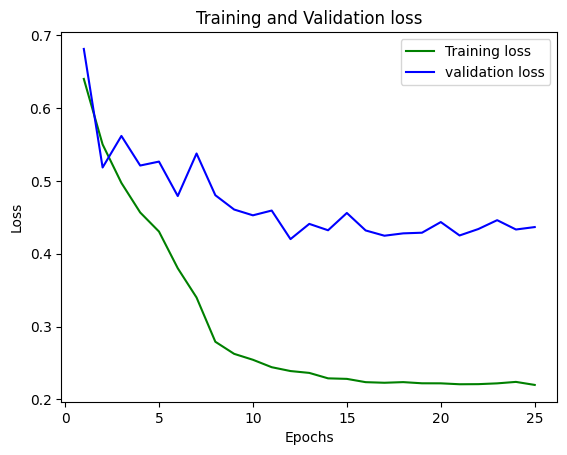

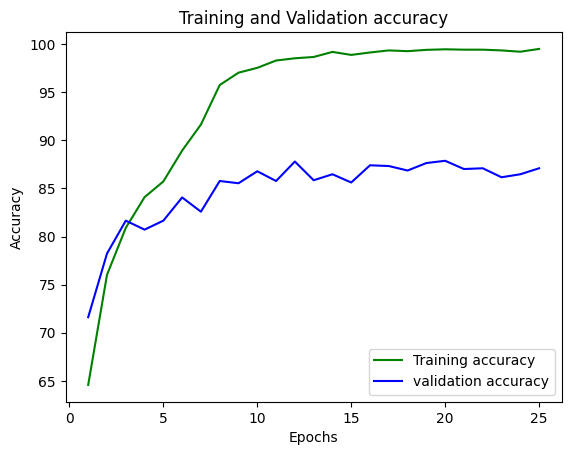

<Figure size 640x480 with 0 Axes>

In [ ]:
#curve plotting based on saved checkpoint

checkpoint_path = 'checkpoint.pt'
metrics_file_path = 'metrics.json'
best_model_path = 'best_model.pt'
model = Model(num_classes=2)
model.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(model.device)
criterion = nn.CrossEntropyLoss(label_smoothing=0.1).to(model.device)

# Resume or initialize
if os.path.exists(checkpoint_path):
    start_epoch, best_acc, metrics_data = load_checkpoint(checkpoint_path, metrics_file_path)
# Final analysis
plot_loss(metrics_data['train_loss_avg'], metrics_data['test_loss_avg'], len(metrics_data['train_loss_avg']))
plot_accuracy(metrics_data['train_accuracy_avg'], metrics_data['test_accuracy_avg'], len(metrics_data['train_accuracy_avg']))
#plot_learning_rates(metrics_data['learning_rates'])
#print_confusion_matrix(test_labels, test_preds)


In [ ]:
#delete working directory
import os
import shutil

working_dir = '/kaggle/working/'
for item in os.listdir(working_dir):
    item_path = os.path.join(working_dir, item)
    try:
        if os.path.isfile(item_path):
            os.remove(item_path)
            print(f"Deleted file: {item_path}")
        elif os.path.isdir(item_path):
            shutil.rmtree(item_path)
            print(f"Deleted directory: {item_path}")
    except Exception as e:
        print(f"Error deleting {item_path}: {e}")

print("Contents of /kaggle/working/ have been deleted.")